In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, cheb2poly
import sys
sys.path.insert(0, '../seal_wrapper/')
from seal_wrapper import EA

In [16]:
x = np.linspace(-5.9, 3.0, 90)
x

array([-5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5. , -4.9,
       -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9, -3.8,
       -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8, -2.7,
       -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7, -1.6,
       -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5,
       -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,
        0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,
        2.9,  3. ])

In [17]:
def relu(z):
    return np.maximum(0, z)

In [18]:
y = relu(x)

In [19]:
coeffs_cheb = chebfit(x, y, deg=4)

In [20]:
coeffs = cheb2poly(coeffs_cheb)
coeffs

array([ 0.30761674,  0.46522413,  0.14924022,  0.00827286, -0.00098693])

In [21]:
data = x[:, None] ** np.arange(coeffs.shape[0])

In [22]:
relu_approx = data.dot(coeffs[:, None])

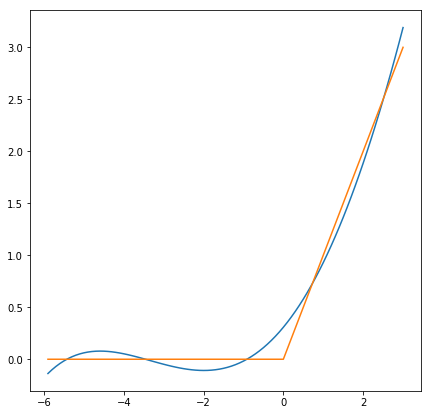

In [23]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)

In [24]:
x_enc = EA(x[:, None], True)

In [25]:
x_relu = x_enc.relu()

In [26]:
relu_vals = x_relu.values()

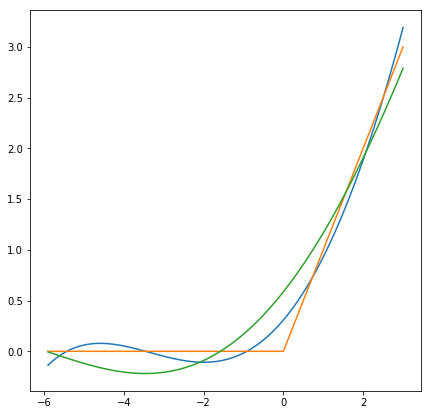

In [27]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)
plt.plot(x, relu_vals)